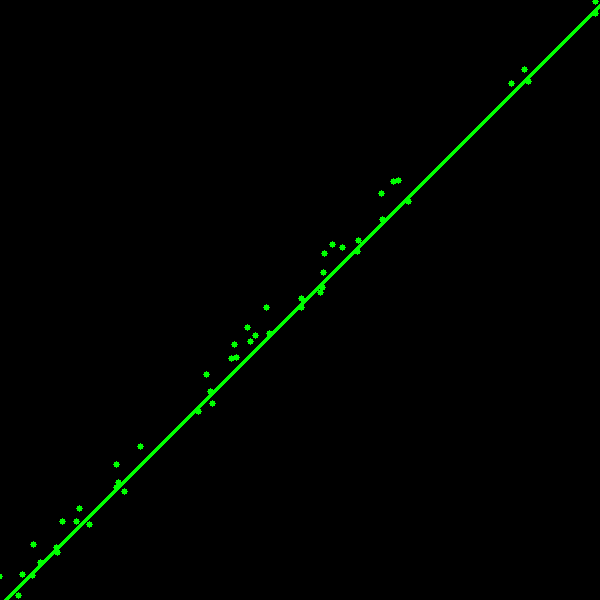

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


image = cv2.imread('/content/pontos_ransac (1).png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

edges = cv2.Canny(gray, 50, 150, apertureSize=3)

points = np.column_stack(np.where(edges > 0))

num_iterations = 1000
threshold = 1.0
best_inliers_count = 0
best_line = None

for _ in range(num_iterations):
    sample_indices = np.random.choice(len(points), size=2, replace=False)
    sample_points = points[sample_indices]

    x1, y1 = sample_points[0]
    x2, y2 = sample_points[1]
    if x1 == x2:
        continue
    m = (y2 - y1) / (x2 - x1)
    b = y1 - m * x1

    inliers_count = 0
    inliers = []

    for point in points:
        x, y = point
        distance = abs(m * x - y + b) / np.sqrt(m ** 2 + 1)
        if distance < threshold:
            inliers_count += 1
            inliers.append(point)

    if inliers_count > best_inliers_count:
        best_inliers_count = inliers_count
        best_line = (m, b)

if best_line:
    m, b = best_line
    x1 = 0
    y1 = int(b)
    x2 = image.shape[1]
    y2 = int(m * x2 + b)
    cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

cv2_imshow(image)
